<a href="https://colab.research.google.com/github/kiringki/DataProject/blob/main/MiniProject_01_SunnyAnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[미니프로젝트 1] 주차시설 확보를 위한 데이터 분석**
### 프로젝트 개요
본 프로젝트는 서울시 서초구와 양천구의 공영주차장 정보 및 불법 주정차 단속 현황 데이터를 분석하여, 각 지역의 주차 문제를 파악하고 주차 공간 공급과 불법 주정차 발생 간의 연관성을 시각적으로 탐색합니다. 최종적으로 데이터 분석 결과를 바탕으로 주차 문제 해결을 위한 아이디어를 제안하는 것을 목표로 합니다.

## **< 공영주차장 + 주정차 단속현황 데이터 분석하기 >**


## 1. 환경 설정 및 데이터 불러오기
### 1.1. 라이브러리 임포트 및 한글 폰트 설정
분석에 필요한 라이브러리를 불러오고, 시각화 시 한글이 깨지지 않도록 맑은고딕 폰트를 설정합니다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/국방AI교육/대면교육/6. 미니 프로젝트 1차/data

/content/drive/MyDrive/국방AI교육/대면교육/6. 미니 프로젝트 1차/data


In [ ]:
!pip install koreanize_matplotlib

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 30s (347 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125080 files and direc

In [ ]:
# 데이터 분석 및 시각화를 위한 라이브러리들을 임포트합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
sns.set(font='NanumBarunGothic')

# 경고 제거
import warnings
warnings.filterwarnings(action='ignore')

## 1.2. 데이터 불러오기 및 전처리
서초구와 양천구의 공영주차장 및 주정차 단속 데이터를 불러온 후, 분석에 용이하도록 데이터 형식을 변환하고 정제하는 전처리 과정을 진행합니다.

### 1) 데이터 불러오기
서초구 및 양천구 공영주차장 및 주정차 단속 데이터를 로드합니다.

**참고사항**: 한글 깨짐현상의 원인은 한글 표현하는 인코딩이 다르기 때문입니다. <br/>
파일을 읽어 올때 encoding을 설정해서 로드 합니다. (encoding='cp949'은 한글 파일을 읽기 위함)

**로드할 파일**
  - 서울시 서초구 공영주차장 안내 정보
  - 서울특별시 서초구_주정차단속 시간별 현황
  - 서울시 양천구 공영주차장 안내 정보
  - 서울특별시 양천구_주정차위반단속현황 (20231220, 20221231)

In [ ]:
# 여기에 코드를 작성해보세요!


sc_gy = pd.read_csv('./서초구/서울시 서초구 공영주차장 안내 정보.csv', encoding='cp949')
sc_bb = pd.read_csv('./서초구/서울특별시 서초구_주정차단속 시간별 현황_20241231.csv',encoding='cp949')

yc_gy = pd.read_csv('./양천구/서울시 양천구 공영주차장 안내 정보.csv', encoding='cp949')
yc_bb1 = pd.read_csv('./양천구/서울특별시_양천구_주정차위반단속현황_20221231.csv', encoding='cp949')
yc_bb2 = pd.read_csv('./양천구/서울특별시 양천구_주정차위반단속현황_20231220.csv', encoding='cp949')


### 2) 데이터 전처리 및 탐색 (1)

**서초구 데이터 전처리**
  - 단속일시 컬럼은 형식을 변환하고 유효한 값이 없는 경우 제거하고, 분석에 필요한 정보를 정리해 봅니다.
  - 단속동 컬럼 및 주소 컬럼에서 동이름을 추출하여 정리 합니다.

In [ ]:


#날짜, 단속 장소, 동을 string 으로 바꾸기
sc_bb1 = sc_bb.astype({'단속일시':'str', '단속장소':'str', '단속동':'str'})

# 날짜에서 시간값 지우기 작업
sc_bb_date = []

for i in sc_bb1['단속일시']:
  sc_bb_date.append(i.split(' ')[0])

sc_bb1['단속일시'] = sc_bb_date   #날짜에서 시간 제거 완료

#중복된 데이터 없애기 및 인덱스 초기화
sc_bb2 = sc_bb1.drop_duplicates(['단속일시', '단속장소', '위반내용'], ignore_index=True)
sc_bb2


# sc_bb1은 날짜를 string으로 바꾸고 시간을 없앤 데이터
# sc_bb2는 날짜와, 장소, 위반내용이 똑같이 중복된 데이터를 삭제한 데이터

,단속일시,과태료 원금,단속동,단속장소,위반내용
0,2022-01-01,40000,서초동,서울특별시 서초구 반포대로22길 73 (서초동),주정차금지(황색실선)구역
1,2022-01-01,40000,방배동,서울특별시 서초구 효령로25길 59 (방배동),주정차금지(황색실선)구역
2,2022-01-01,40000,방배동,서울특별시 서초구 방배천로 155,교통소통장애
3,2022-01-01,40000,서초동,서울특별시 서초구 효령로 292,버스정류소
4,2022-01-01,40000,서초동,"서울특별시 서초구 서초대로77길 37 (서초동, 서초동",주정차금지(황색실선)구역
...,...,...,...,...,...
295154,2024-12-31,40000,잠원동,서울특별시 서초구 강남대로97길 17,횡단보도
295155,2024-12-31,40000,염곡동,서울특별시 서초구 탑성말길 24 (염곡동),보도
295156,2024-12-31,40000,방배동,서울특별시 서초구 도구로 123-8,보도
295157,2024-12-31,40000,반포동,"서울특별시 서초구 주흥17길 25 (반포동, 반포훼밀리",소화전


In [ ]:
# dong = sc_bb2['단속동'].value_counts().head(10).reset_index()
# dong_list = dong['단속동'].tolist()

# print(sc_bb2.shape[0])

# for i in range(sc_bb2.shape[0]):
#   if sc_bb2.loc[i, '단속동'] not in dong_list:
#     sc_bb2 = sc_bb2.drop(index=i)

# print(sc_bb2.shape[0])
# # 주요 10개의 동 추출

In [ ]:
# 동과 장소에서 동 이름 추출하기

# dong = ['서초동', '서초1동', '서초2동', '서초3동', '서초4동', '잠원동','반포본동','반포1동','반포2동','반포3동','반포4동','방배본동','방배1동','방배2동','방배3동','방4동','내곡동','양재1동','양재2동']
# df = pd.DataFrame(dong)


### 2) 데이터 전처리 및 탐색 (2)

**양천구 데이터 전처리**

  - 2개의 단속 정보 파일을 로드해서 동일한 컬럼 구성을 가지도록 합쳐 봅니다.
  - 유효하지 않는 단속 정보(단속일시, 단속동, ...)를 정리 합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

yc_bb1 = yc_bb1.dropna(axis=1)
yc_bb2 = yc_bb2.dropna(axis=1)



#날짜, 단속 장소, 동을 string 으로 바꾸기
yc_bb1 = yc_bb1.astype({'단속일시':'str', '단속장소':'str', '단속동':'str'})
yc_bb2 = yc_bb2.astype({'단속일시':'str', '단속장소':'str', '단속동':'str'})

# 날짜에서 시간값 지우기 작업
yc_bb_date1 = []
yc_bb_date2 = []

for i in yc_bb1['단속일시']:
  yc_bb_date1.append(i.split(' ')[0])
yc_bb1['단속일시'] = yc_bb_date1   #날짜에서 시간 제거 완료

for i in yc_bb2['단속일시']:
  yc_bb_date2.append(i.split(' ')[0])
yc_bb2['단속일시'] = yc_bb_date2   #날짜에서 시간 제거 완료

#중복된 데이터 없애기 및 인덱스 초기화
yc_bb1 = yc_bb1.drop_duplicates(['단속일시', '단속장소', '위반내용'], ignore_index=True)
yc_bb2 = yc_bb2.drop_duplicates(['단속일시', '단속장소', '위반내용'], ignore_index=True)

yc_outer = pd.merge(yc_bb1, yc_bb2, how='outer')
yc_outer = yc_outer.dropna(axis=1)



In [ ]:
# 여기에 코드를 작성해보세요!




## 2. 데이터 분석 및 시각화
### 2.1. 지역별 불법 주정차 단속 현황 비교
각 구별로 어느 동에서 불법 주정차 단속이 가장 많이 발생하는지 상위 10개 동을 막대그래프로 시각화하여 비교합니다.


### **단속 현황 비교**
구별로 단속 현황을 시각화 해 보고 ,어떤 동에서 불법 주정차 단속이 가장 많이 발생하는지 확인해 봅니다.

**서초구 단속 현황**
  - '단속동'별로 단속 건수를 세고, 가장 많은 상위 10개 동을 추출합니다.
  - Seaborn의 barplot을 이용해 서초구 단속 상위 10개 동을 시각화합니다.

**양천구 단속 현황**
  - '단속동'별로 단속 건수를 세고, 가장 많은 상위 10개 동을 추출합니다.
  - Seaborn의 barplot을 이용해 서초구 단속 상위 10개 동을 시각화합니다.

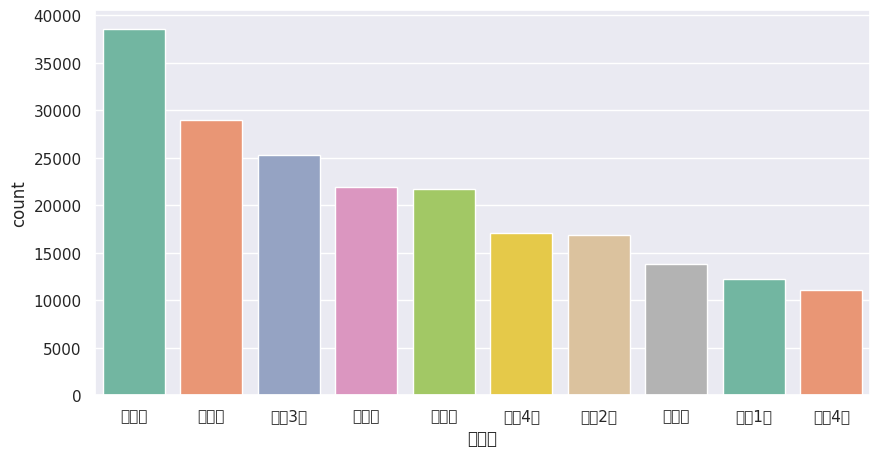

,단속동,count
0,서초동,38587
1,방배동,28995
2,서초3동,25280
3,잠원동,21968
4,양재동,21724
5,서초4동,17030
6,서초2동,16812
7,반포동,13761
8,서초1동,12282
9,반포4동,11080


In [ ]:
# 서초구

sc_dong = sc_bb2['단속동'].value_counts().head(10).reset_index()
yc_dong = yc_outer['단속동'].value_counts().head(10).reset_index()

plt.figure(figsize=(10,5))

sns.set(style="darkgrid")
sns.barplot(x='단속동', y='count', data=sc_dong, palette='Set2')
plt.show()


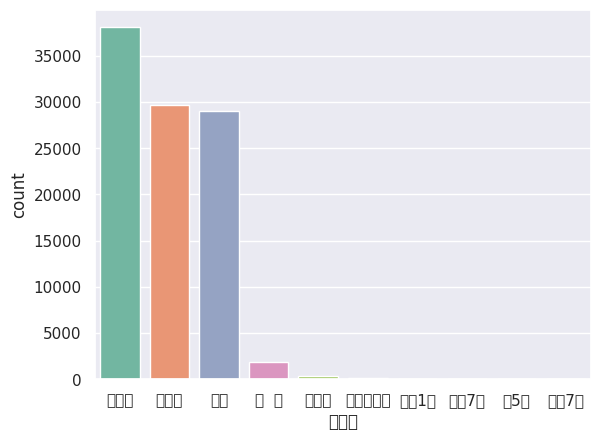

In [ ]:
# 양천구


sns.barplot(x='단속동', y='count', data=yc_dong, palette='Set2')
plt.show()



## 2.2. 지역별 공영주차장 공급 현황
각 지역의 행정동별 공영주차장 총 주차면 수를 계산하고 시각화하여 주차 공간 공급 현황을 비교합니다.

### **공급현황 비교**
지역별 공영주차장 공급 현황을 비교 해 봅니다.

**서초구 동별 주차면 수**
  - '주소_동'을 기준으로 그룹화하여 '총 주차면'의 합계를 계산하고, 내림차순으로 정렬합니다.
  - 동별 총 주차면 수를 막대그래프로 시각화합니다.

**양천구 동별 주차면 수**
  - '주소_동'을 기준으로 그룹화하여 '총 주차면'의 합계를 계산하고, 내림차순으로 정렬합니다.
  - 동별 총 주차면 수를 막대그래프로 시각화합니다.

In [ ]:
# 동을 string 으로 바꾸기

#서초 공영주차 데이터 동을 string 으로 바꾸기
sc_gy1 = sc_gy.astype({'주소':'str'})

# 날짜에서 시간값 지우기 작업
sc_gy_d = []

for i in sc_gy1['주소']:
  sc_gy_d.append(i.split(' ')[1])

sc_gy1['주소'] = sc_gy_d   #날짜에서 시간 제거 완료


#양천 공영주차 데이터 동을 string 으로 바꾸기
yc_gy1 = yc_gy.astype({'주소':'str'})

# 날짜에서 시간값 지우기 작업
yc_gy_d = []

for i in yc_gy1['주소']:
  yc_gy_d.append(i.split(' ')[1])

yc_gy1['주소'] = yc_gy_d   #날짜에서 시간 제거 완료


In [ ]:
sc_gy2 = sc_gy1.groupby('주소').sum('총 주차면').sort_values('총 주차면').reset_index()
yc_gy2 = yc_gy1.groupby('주소').sum('총 주차면').sort_values('총 주차면').reset_index()

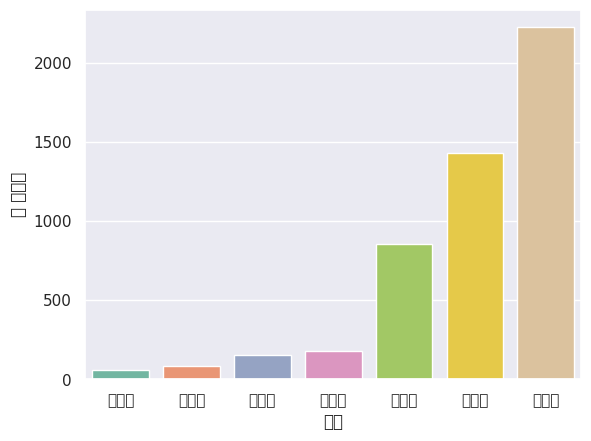

In [ ]:
#서초 그래프


sns.barplot(x='주소', y='총 주차면', data=sc_gy2, palette='Set2')
plt.show()

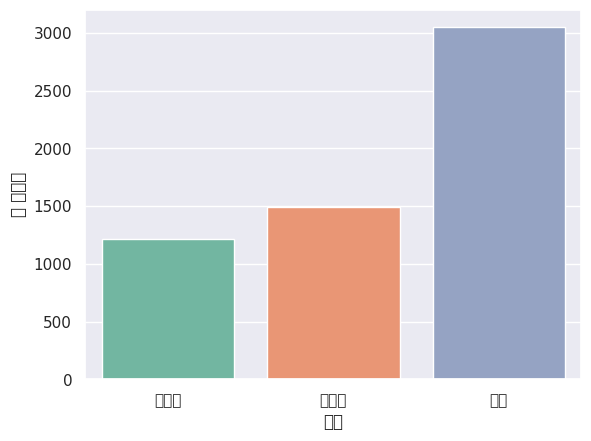

In [ ]:
#양천 주차

sns.barplot(x='주소', y='총 주차면', data=yc_gy2, palette='Set2')
plt.show()

## 2.3. 주차장 공급과 불법 주정차의 연관 분석
주차 공간이 부족한 곳에서 불법 주정차가 많이 발생하는지 확인하기 위해, 동별 단속 건수와 총 주차면 수를 이중 축 그래프로 시각화하여 비교 분석합니다.

### **주차장 공급과 불법 주정차 위반과의 관계 살펴보기**

주차장 공급과 불법 주정차 단속 건수와의 관계를 확인해 봅니다.

**처리절차 예시**
  - 데이터 프레임으로 변환 : 분석을 위해 Series 형태의 데이터를 DataFrame으로 변환합니다.
  - 데이터 병합 : '주소_동'을 기준으로 단속 건수 데이터와 주차면 수 데이터를 병합합니다.
  - 시각화 : 단속건수를 막대그래프로 그립니다. 총주차면을 꺾은선그래프로 그립니다.


In [ ]:

# sc_bb2 서초 불법
# yc_outer 양천 불법

sc_gy3 = pd.DataFrame(sc_gy2[['주소', '총 주차면']])

yc_gy3 = pd.DataFrame(yc_gy2[['주소', '총 주차면']])


sc_bb3 = pd.DataFrame(sc_bb2.value_counts('단속동').head(10).reset_index())
sc_bb3 = sc_bb3.rename(columns={'단속동':'주소', 'count':'단속건수'})


yc_bb3 = pd.DataFrame(yc_outer.value_counts('단속동').head(10).reset_index())
yc_bb3 = yc_bb3.rename(columns={'단속동':'주소', 'count':'단속건수'})



In [ ]:
#서초구

sc_fi = pd.merge(left = sc_gy3 , right = sc_bb3, how = "inner", on = "주소")
display(sc_fi)

#양천구

yc_fi = pd.merge(left = yc_gy3 , right = yc_bb3, how = "inner", on = "주소")
display(yc_fi)

,주소,총 주차면,단속건수
0,잠원동,60,21968
1,서초동,152,38587
2,방배동,854,28995
3,양재동,1430,21724
4,반포동,2223,13761


,주소,총 주차면,단속건수
0,신정동,1215,38089
1,신월동,1489,29679
2,목동,3050,29038


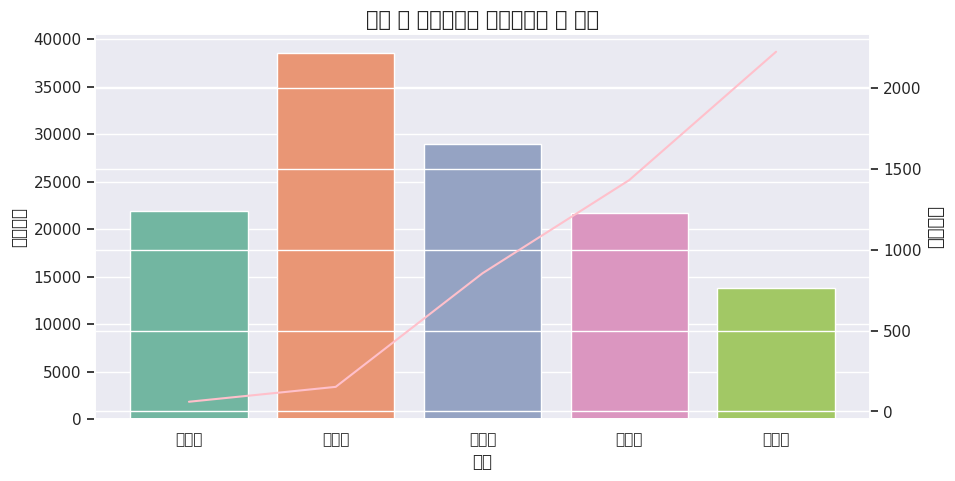

In [ ]:
# 서초!


fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 1, 1)

sns.barplot(x='주소', y='단속건수', data=sc_fi, palette ="Set2")

ax2 = ax1.twinx()

sns.lineplot(x='주소', y='총 주차면', data=sc_fi, color = 'pink')

plt.title('동네 별 단속건수와 공영주차장 수 비교', fontsize = 15)
plt.xlabel('동네', fontsize = 13)
plt.ylabel('단속건수', fontsize = 13)
plt.xticks(fontsize = 12, rotation=0)
plt.legend
plt.show()




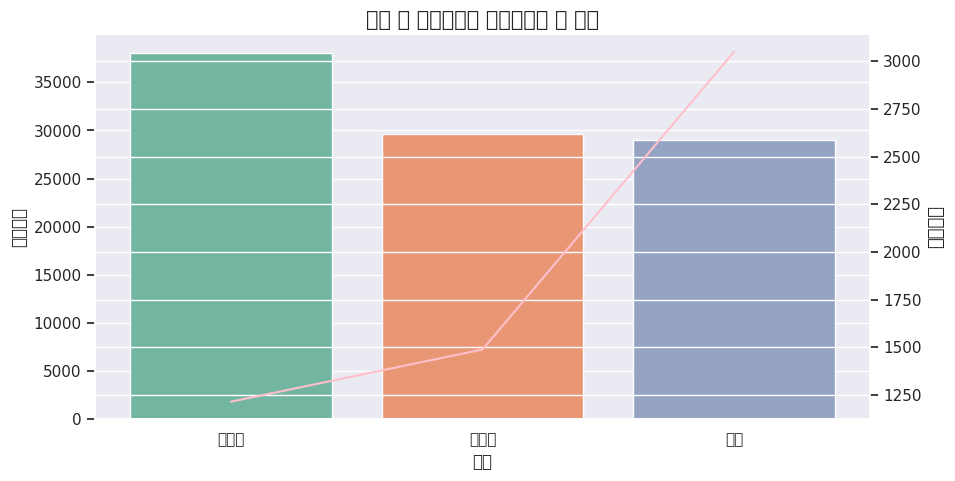

In [ ]:
# 양천!


fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 1, 1)

sns.barplot(x='주소', y='단속건수', data=yc_fi, palette ="Set2")

ax2 = ax1.twinx()

sns.lineplot(x='주소', y='총 주차면', data=yc_fi, color = 'pink')

plt.title('동네 별 단속건수와 공영주차장 수 비교', fontsize = 15)
plt.xlabel('동네', fontsize = 13)
plt.ylabel('단속건수', fontsize = 13)
plt.xticks(fontsize = 12, rotation=0)
plt.legend
plt.show()




## 3. 결론 및 아이디어 제안
### 분석 결과 요약 및 아이디어 제안
시각화된 분석 결과를 바탕으로 각 지역의 주차 문제에 대한 결론을 도출하고, 이를 해결하기 위한 구체적인 아이디어를 제시합니다.

In [ ]:
# 결론 도출 : 공영주차장 수와 불법주차 단속 건수는 무조건 관계가 있는 것은 아니다
# 해결방법 : 단순 동에 대한 분석보다 더 세부적으로 적발 장소를 지도위에 표시하여 주로 적발되는 구역의 주차장 여부를 확인하여 관계성을 확인한다.
#(잘 적발되지 않는 지역에 주차장이 많고 적발되는 지역에 주차장이 없을 수 있기 때문이다)


---

## **< 보강데이터(서울생활인구 + 사업체 현황) 추가하여 분석에 활용하기 >**



## 분석데이터를 추가해서, 추가적인 질문에 대한 분석을 해 봅니다.
### 추가 데이터(업체 현황정보, 생활인구)를 활용하여, 데이터 연관성을 분석해 봅니다.

### 1. 데이터 전처리 (1)

추가된 데이터에 대한 전처리(결측치, 이상치 처리)를 수행해 봅니다.
  - 사업체 현황 정보 로드 합니다.
  - 사업체 정보에서 불필요한 정보를 제거하고, 날짜정보를 전처리 합니다.

In [ ]:
# 여기에 데이터 전처리 코드를 작성해보세요!





In [ ]:
# 여기에 데이터 전처리 코드를 작성해보세요!




### 1. 데이터 전처리 (2)
  - 행정동코드 데이터를 로드 합니다.
  - 행정동코드 데이터에서 불필요한 데이터를 제거 합니다.

In [ ]:
# 여기에 데이터 전처리 코드를 작성해보세요!





In [ ]:
# 여기에 데이터 전처리 코드를 작성해보세요!





### 1. 데이터 전처리 (3)
  - 서울 생활인구(내국인)을 로드 한다.
  - 행정동코드 데이터와 머징하여 지역정보를 추가 합니다.

In [ ]:
# 여기에 데이터 전처리 코드를 작성해보세요!





In [ ]:
# 여기에 데이터 전처리 코드를 작성해보세요!






### 2. 데이터 분석 및 시각화 (1)

추가된 데이터에 대한 탐색적 데이터 분석을 수행해 봅니다.

  - ex. 신정동과 잠원동의 주차면수 부족 원인 파악을 위해, 신정동과 잠원동 소재의 사업체 현황을 확인해 봅니다.

In [ ]:
# 여기에 데이터 분석 및 시각화 코드를 작성해보세요!





In [ ]:
# 여기에 데이터 분석 및 시각화 코드를 작성해보세요!




### 2. 데이터 분석 및 시각화 (2)

  - 두 지역에서의 시간대 및 연령대별 생활반응 분석을 통해 연관 관계를 도출합니다.

In [ ]:
# 여기에 데이터 분석 및 시각화 코드를 작성해보세요!





In [ ]:
# 여기에 데이터 분석 및 시각화 코드를 작성해보세요!





### 3. 인사이트 도출

데이터 분석 근거에 대한 결론을 도출하고 제안에 맞는지 확인 해 봅니다.
제안 근거 및 설득력 있는 시각화를 위해서 어떤 방식이 좋은지 생각해 봅니다.


여기에 의견을 적어 봅니다.




---


### **<데이터분석을 경험하며 느낀점을 간단히 작성해주세요>**



```

여기에 적성해주세요


```

